In [ ]:
pip install numpy pandas scikit-learn matplotlib scipy

In [ ]:
pip install openpyxl

###Loading Dataset

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Lab 11 - Clustering/OnlineRetail (1).xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


###Preprocessing

In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_data = df.select_dtypes(include=[np.number])
data_scaled = scaler.fit_transform(numeric_data)

###K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

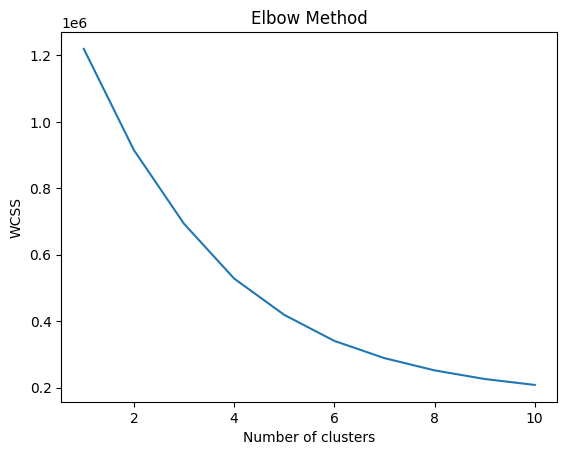

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


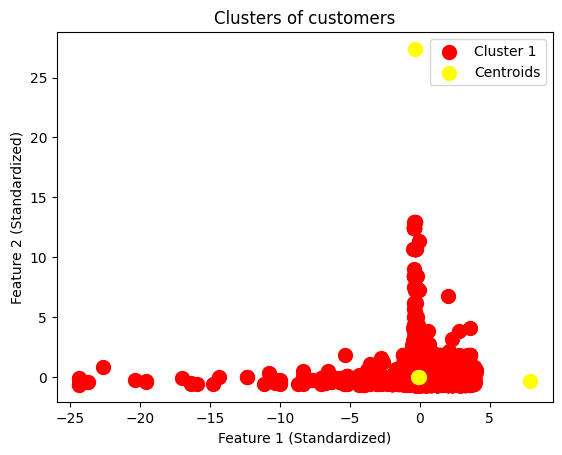

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

plt.scatter(data_scaled[y_kmeans == 0, 0], data_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

###Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
clusters = 4
hc = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_scaled)
if data_scaled.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']
    for i in range(clusters):
        plt.scatter(data_scaled[y_hc == i, 0], data_scaled[y_hc == i, 1],
                    s=100, c=colors[i], label=f'Cluster {i+1}')
    plt.title('Clusters of Data Points')
    plt.xlabel('Scaled Feature 1')
    plt.ylabel('Scaled Feature 2')
    plt.legend()
    plt.show()
else:
    print("Dimensionality reduction needed for visualization.")